In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Set viewing options
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_colwidth', None)

In [3]:
# Read in data
trainlabel = pd.read_csv('data/train_10pct_labels.csv')

In [4]:
train = pd.read_csv('data/train_10pct.csv')

In [5]:
# Merge independent, dependent variable datasets
profile_train = pd.merge(train,trainlabel)

In [33]:
profile_train.head()

building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  count_floors_pre_eq  age  area_percentage  height_percentage land_surface_condition foundation_type roof_type ground_floor_type other_floor_type position plan_configuration  has_superstructure_adobe_mud  has_superstructure_mud_mortar_stone  has_superstructure_stone_flag  has_superstructure_cement_mortar_stone  has_superstructure_mud_mortar_brick  has_superstructure_cement_mortar_brick  has_superstructure_timber  has_superstructure_bamboo  has_superstructure_rc_non_engineered  has_superstructure_rc_engineered  has_superstructure_other legal_ownership_status  count_families  has_secondary_use  has_secondary_use_agriculture  has_secondary_use_hotel  has_secondary_use_rental  has_secondary_use_institution  has_secondary_use_school  has_secondary_use_industry  has_secondary_use_health_post  has_secondary_use_gov_office  has_secondary_use_use_police  has_secondary_use_other  damage_grade
0       802906               6             487           12198                    2   30                6                  5                      t               r         n                 f                q        t                  d                             1                                    1                              0                                       0                                    0                                       0                          0                          0                                     0                                 0                         0                      v               1                  0                              0                        0                         0                              0                         0                           0                              0                             0                             0                        0             3
1        28830               8             900            2812                    2   10                8                  7                      o               r         n                 x                q        s                  d                             0                                    1                              0                                       0                                    0                                       0                          0                          0                                     0                                 0                         0                      v               1                  0                              0                        0                         0                              0                         0                           0                              0                             0                             0                        0             2
2        94947              21             363            8973                    2   10                5                  5                      t               r         n                 f                x        t                  d                             0                                    1                              0                                       0                                    0                                       0                          0                          0                                     0                                 0                         0                      v               1                  0                              0                        0                         0                              0                         0                           0                              0                             0                             0                        0             3
3       590882              22             418           10694                    2   10                6                  5                      t               r    

### Use Pandas Profiling package

In [ ]:
!pip install pandas_profiling 

In [6]:
from pandas_profiling import ProfileReport

In [7]:
profile = ProfileReport(profile_train, title='Report')
profile
# report generated

#### Pandas Profile Report
This software package provided individual bar charts for each variable in our dataset, and also listed correlation values between various feature pairs.

### Use Sweetviz package

In [37]:
!pip install sweetviz

In [38]:
import sweetviz as sv

my_report = sv.analyze(profile_train)
my_report.show_html() 
# report generated


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


#### SweetViz Report
This software package also provided a detailed report complete with charts 
and graphs for each variable as well as a heat map. In addition, it produced tables which contained correlation ratios and uncertainty coefficients for each variable.


### Create/plot target variable correlation datasets

<AxesSubplot:>

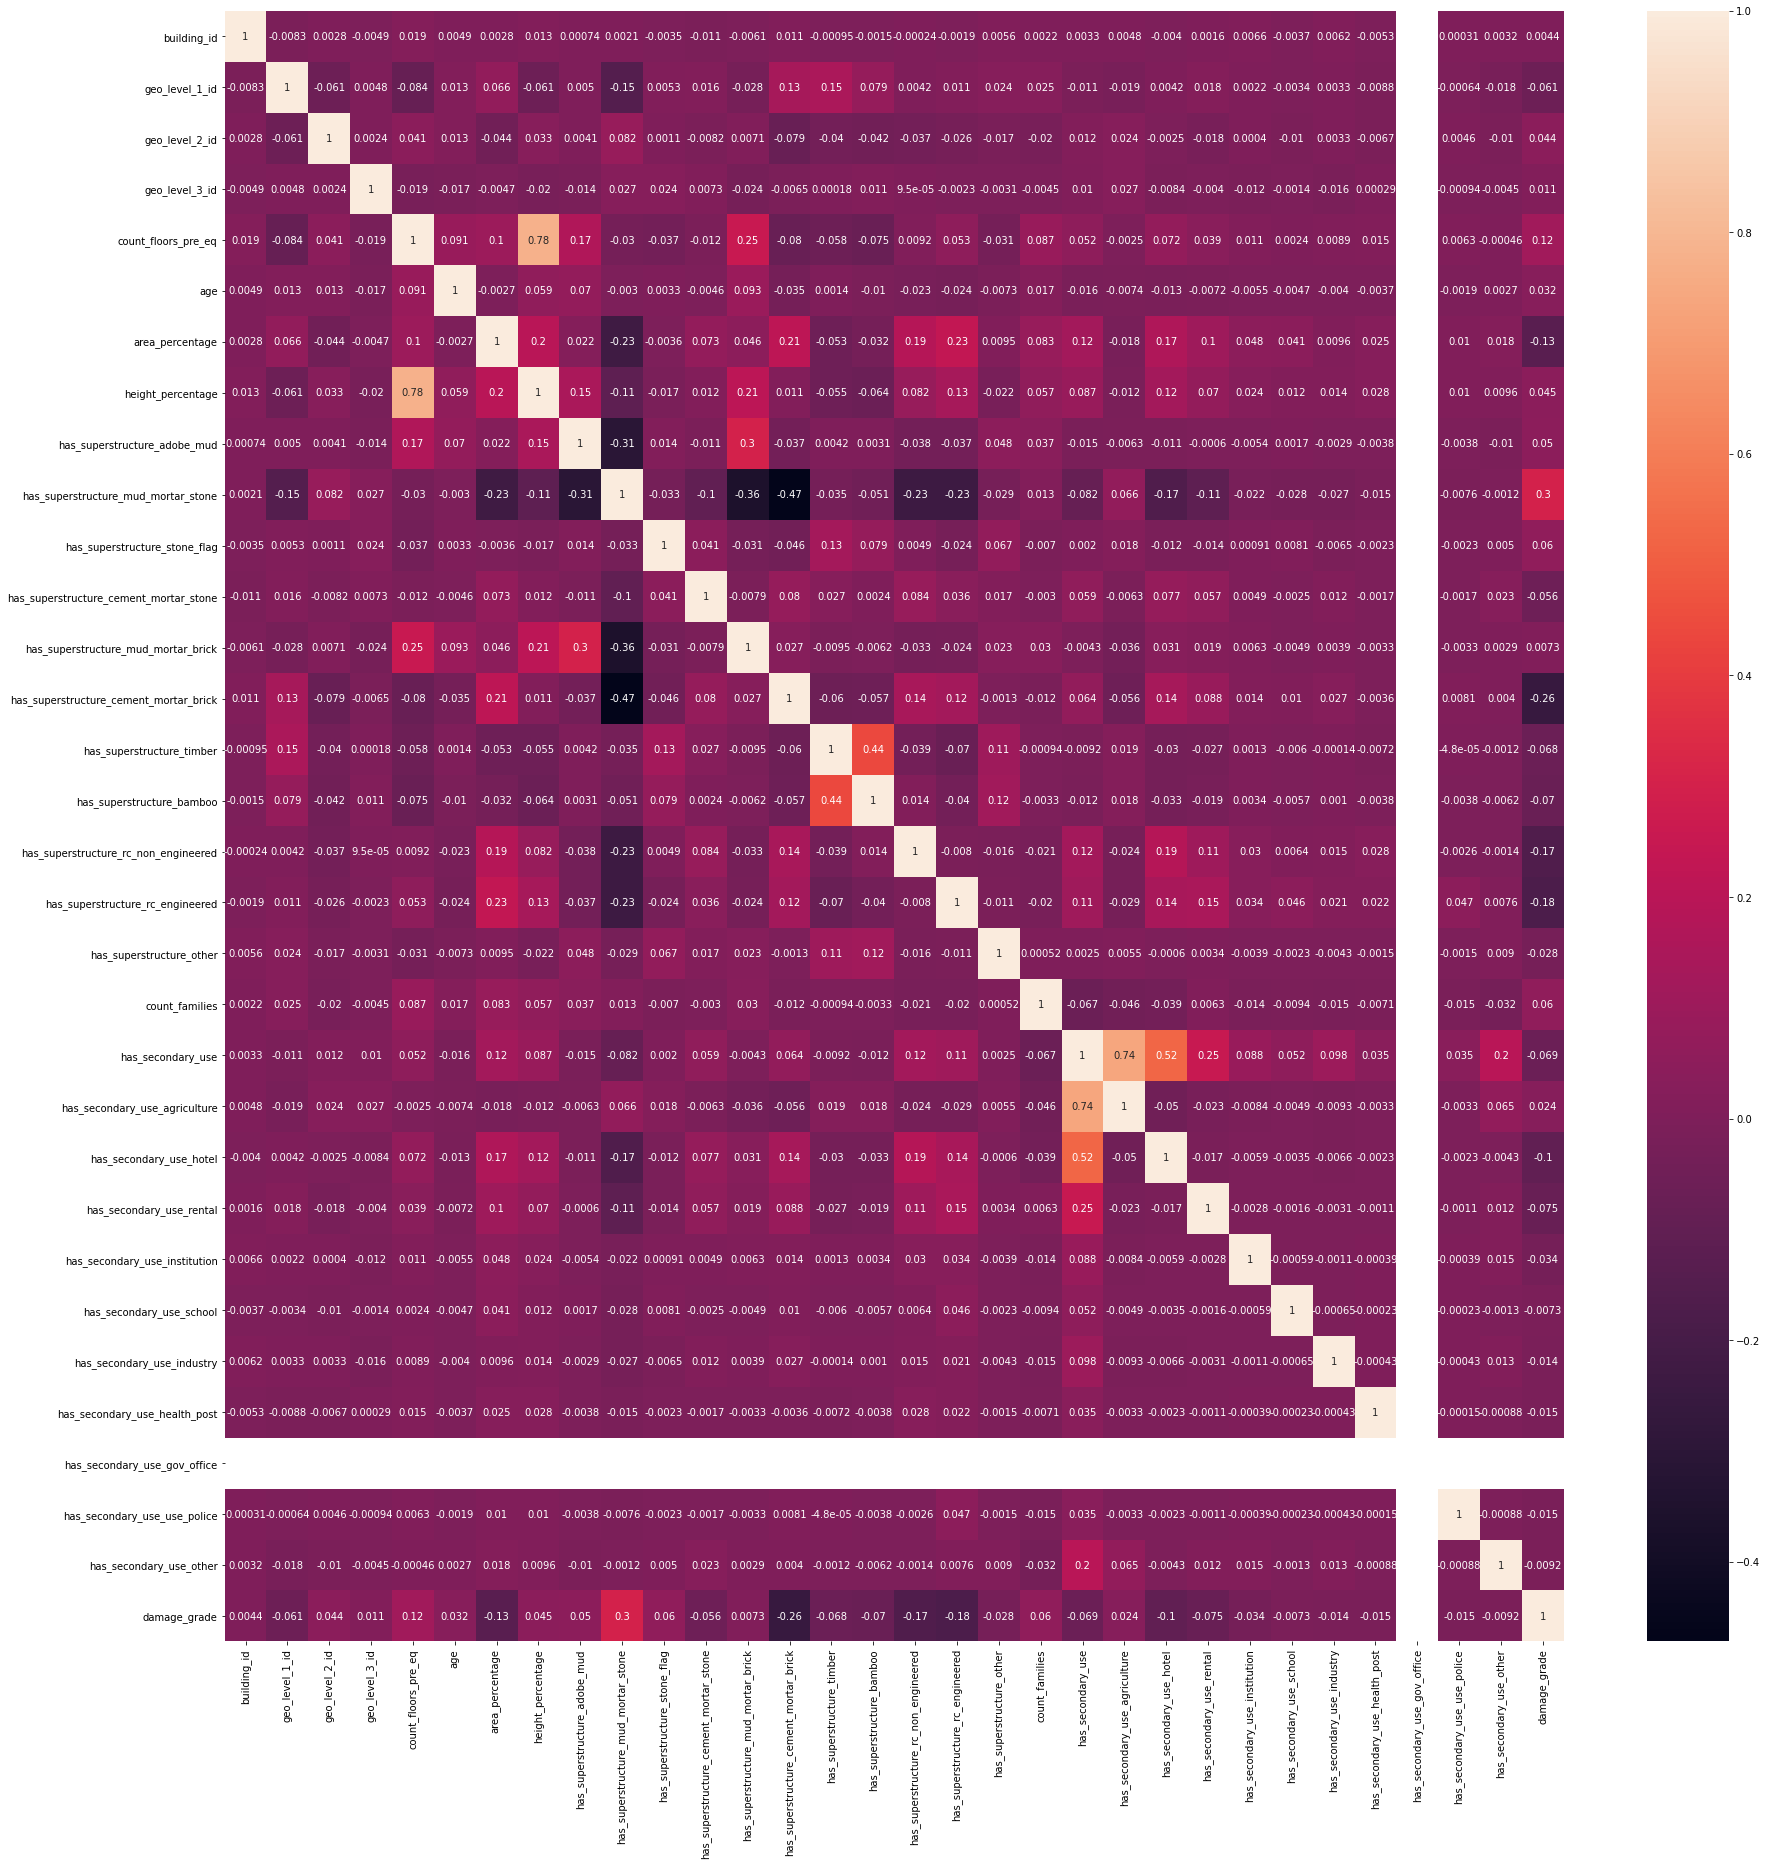

In [10]:
fig, ax = plt.subplots(figsize=(30,30))
sns.heatmap(profile_train.corr(), annot=True)

#### Correlation Heatmap of All Variables
This chart displayed the correlations of each variable with every other variable. Because it was confusing and had very few significant correlation values, this chart was not used in our presentation.

In [11]:
dmg_corr = pd.DataFrame([['geo_level_1_id', .13], ['geo_level_2_id', .05], 
                         ['geo_level_3_id', .02], ['age' , .04],
                    ['area_percentage', .14], ['height_percentage' , .05]], columns=['feature', 'correlation ratio'])
dmg_corr 

feature  correlation ratio
0     geo_level_1_id               0.13
1     geo_level_2_id               0.05
2     geo_level_3_id               0.02
3                age               0.04
4    area_percentage               0.14
5  height_percentage               0.05

In [12]:
dmg_corr = dmg_corr.sort_values('correlation ratio', ascending=False)

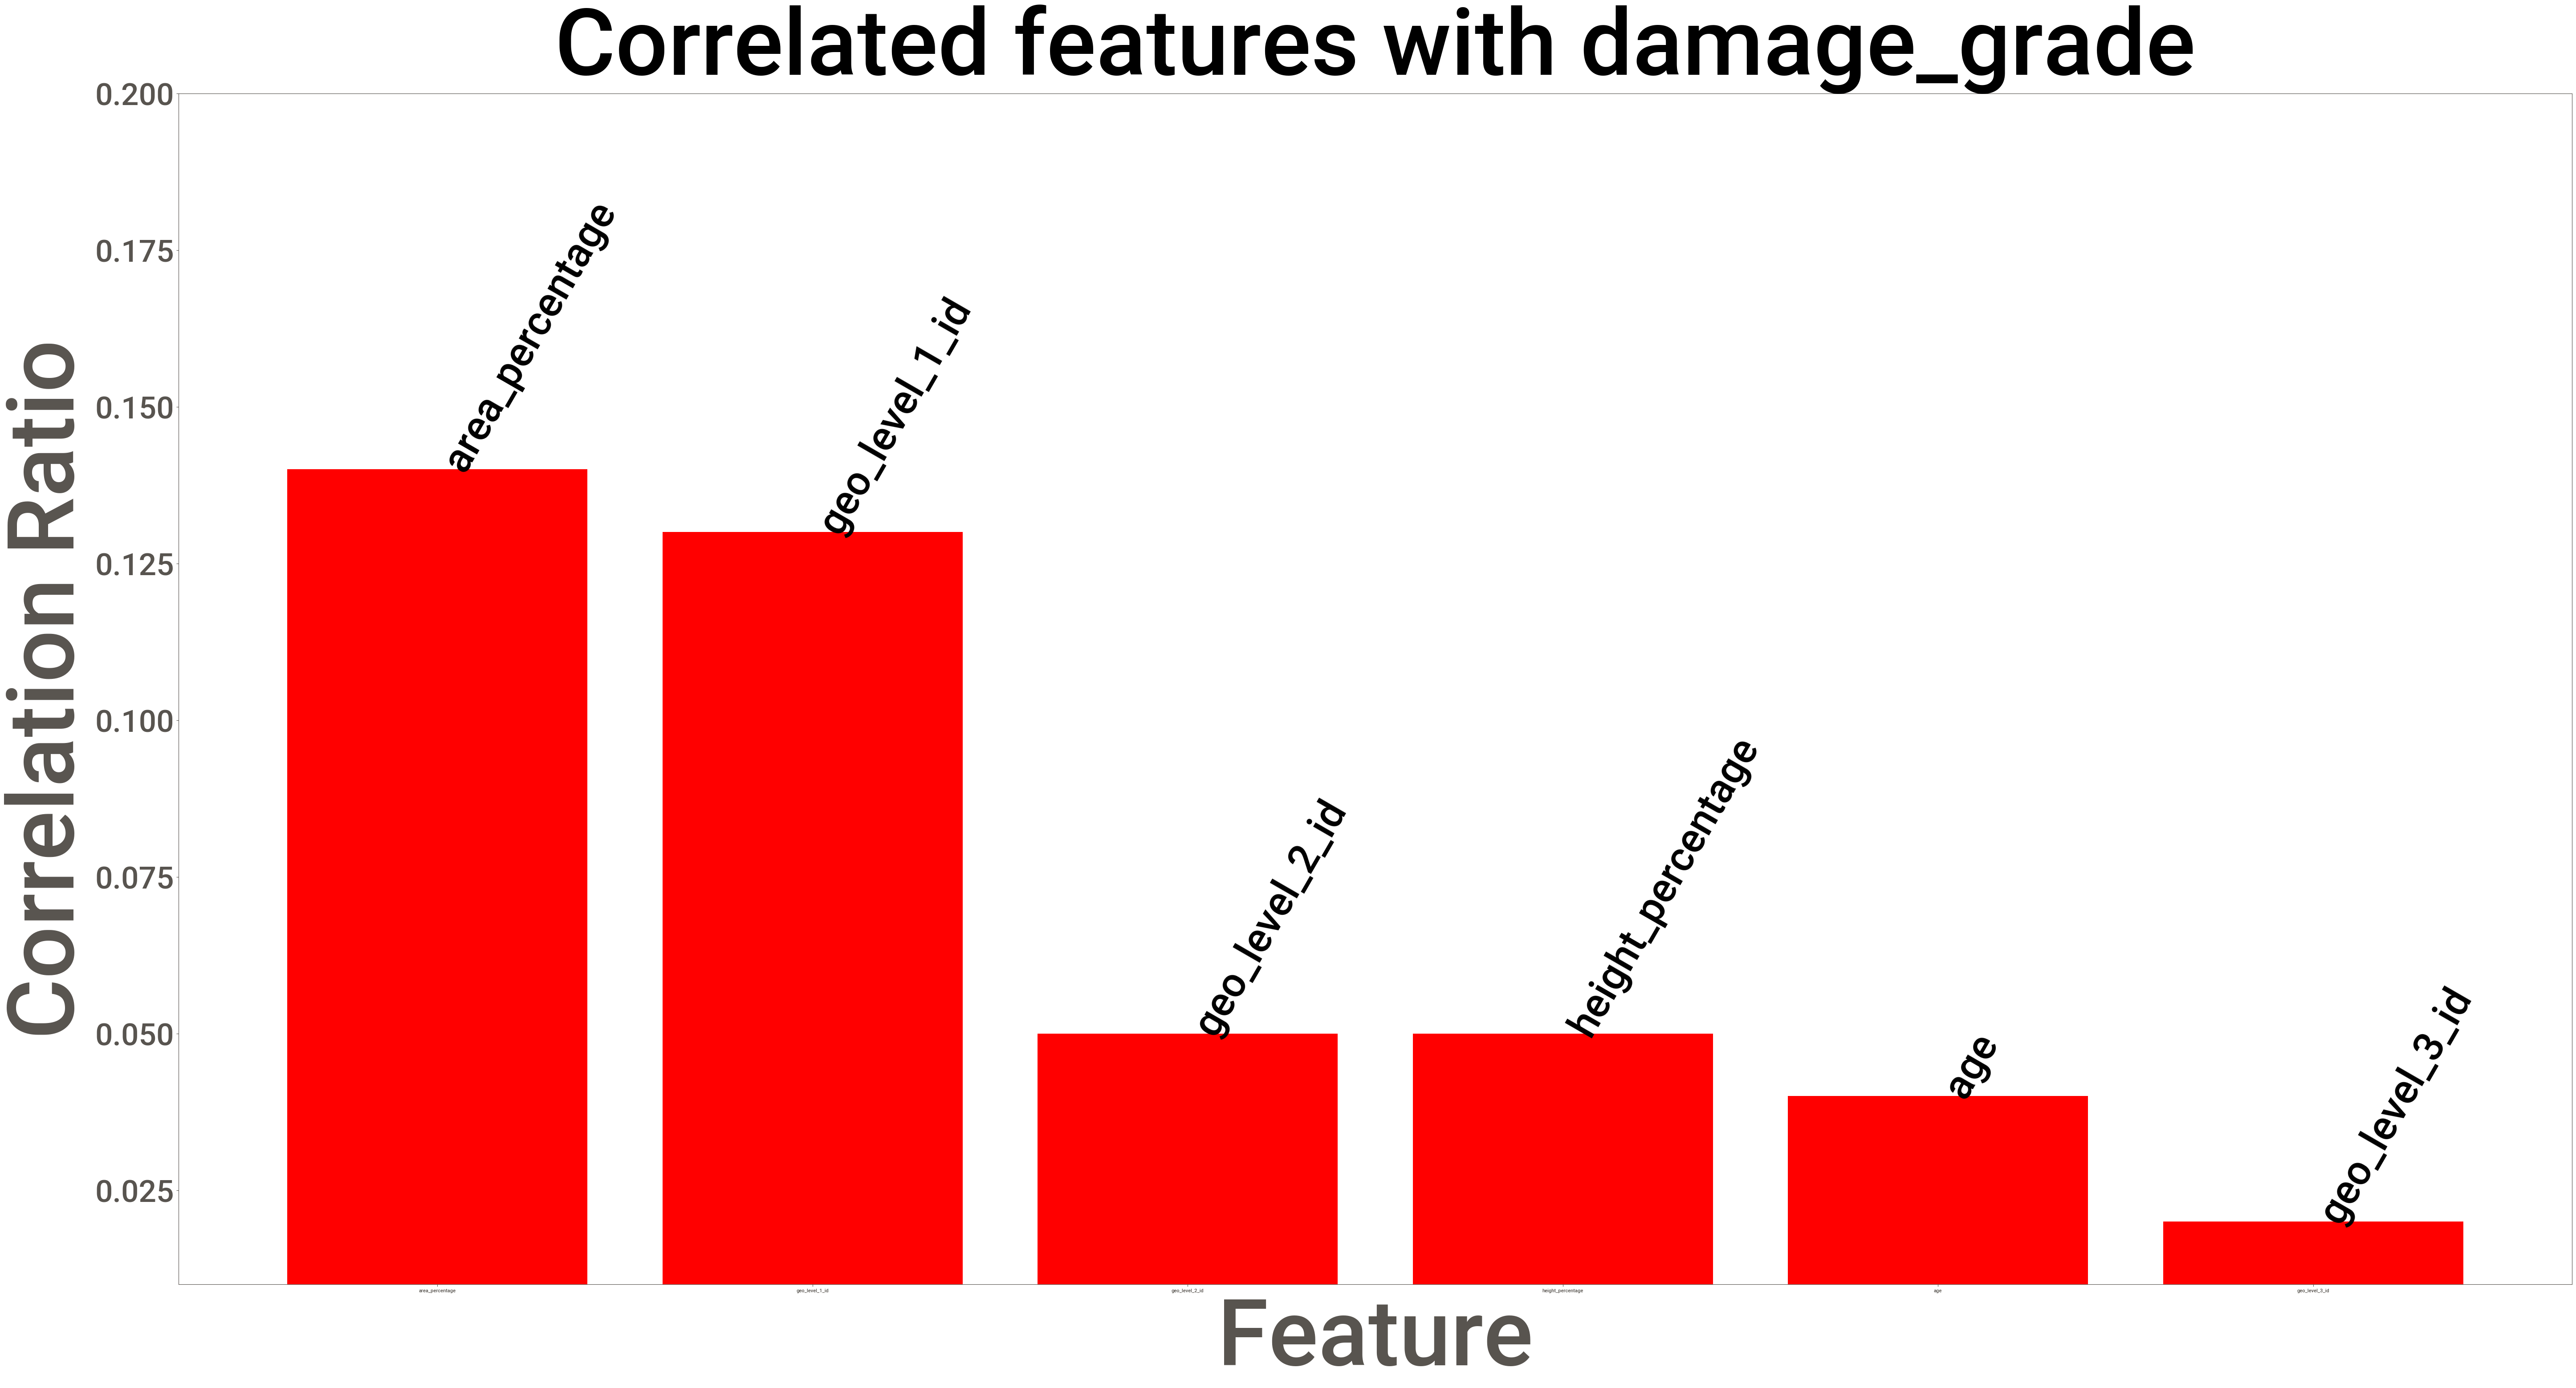

In [21]:
plt.figure(figsize=(10, 10))
plt.bar(dmg_corr['feature'], dmg_corr['correlation ratio'], color='red')
plt.ylim([.01,.20])
plt.yticks(fontsize=50)
for i in range(len(dmg_corr['correlation ratio'])):
    plt.text(x = dmg_corr['feature'][i], y = dmg_corr['correlation ratio'][i], s = dmg_corr['feature'][i], size = 66, rotation=60)
plt.subplots_adjust(top = 2.8, right = 5.5)
plt.title("Correlated features with damage_grade", fontsize=150)
plt.xlabel('Feature', fontsize=150)
plt.ylabel('Correlation Ratio', fontsize=150);

#### Correlated Features with Damage Grade
We looked at all 39 features of the dataset (not including id) to see if we could find any correlation between these variables and the target variable ‘damage_grade.’ Found half a dozen features with small but significant correlation ratios with damage_grade

1. Area_percentage (normalized area of the building footprint):  0.14
2. Geo_level_1_id (top level geographic designator):  0.13
3. Height_percentage (normalized height of the building footprint):  0.05
4. Geo_level_2_id  (mid level geographic designator): 0.05
5. Age of structure:  0.04
6. Geo_level_3_id  (lowest level geographic designator): 0.02 

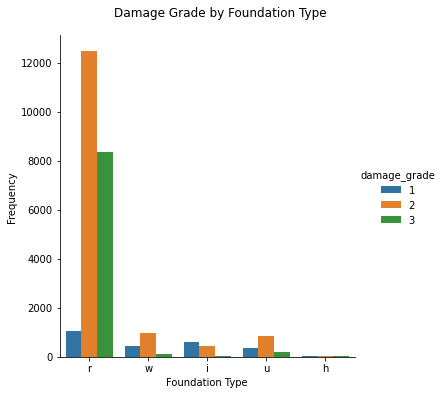

In [14]:
# referenced https://seaborn.pydata.org/generated/seaborn.catplot.html
sns.catplot(x = "foundation_type", data = profile_train, kind = "count", hue = 'damage_grade').set(xlabel = 'Foundation Type', ylabel = 'Frequency');
plt.suptitle('Damage Grade by Foundation Type', y = 1.05);

#### Damage Grade by Foundation Type:
We wanted to also model an example of a feature that would potentially be correlated with damage grade – foundation type
Majority of the foundation type is of type ‘r’. Similar to the overall damage grade distribution, majority of type ‘r’ damage grade is of 2 or 3.
Unfortunately, the categories were obfuscated (for the competition), so we don't know the exact definition of each label (noted as a limitation in the Limitations & Project Refinements)

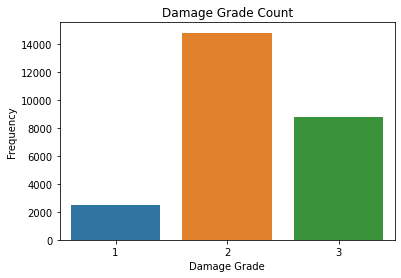

In [15]:
# referenced https://seaborn.pydata.org/generated/seaborn.catplot.html
sns.countplot(x = "damage_grade", data = profile_train)
plt.xlabel('Damage Grade')
plt.ylabel('Frequency')
plt.title('Damage Grade Count');

#### Damage Grade by Count:
Majority of the data is of damage grade 2 (medium damage) or 3 (almost complete destruction), with a damage grade of 1 (low damage) consisting of only 9% of our data sample

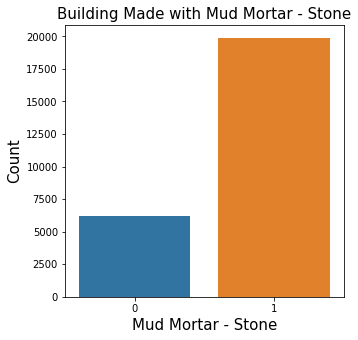

In [32]:
plt.figure (figsize=(5,5));
sns.countplot(x="has_superstructure_mud_mortar_stone", data=profile_train)

plt.title('Building Made with Mud Mortar - Stone', size=15)
plt.xlabel('Mud Mortar - Stone', size=15)
plt.ylabel('Count', size=15)
plt.show()

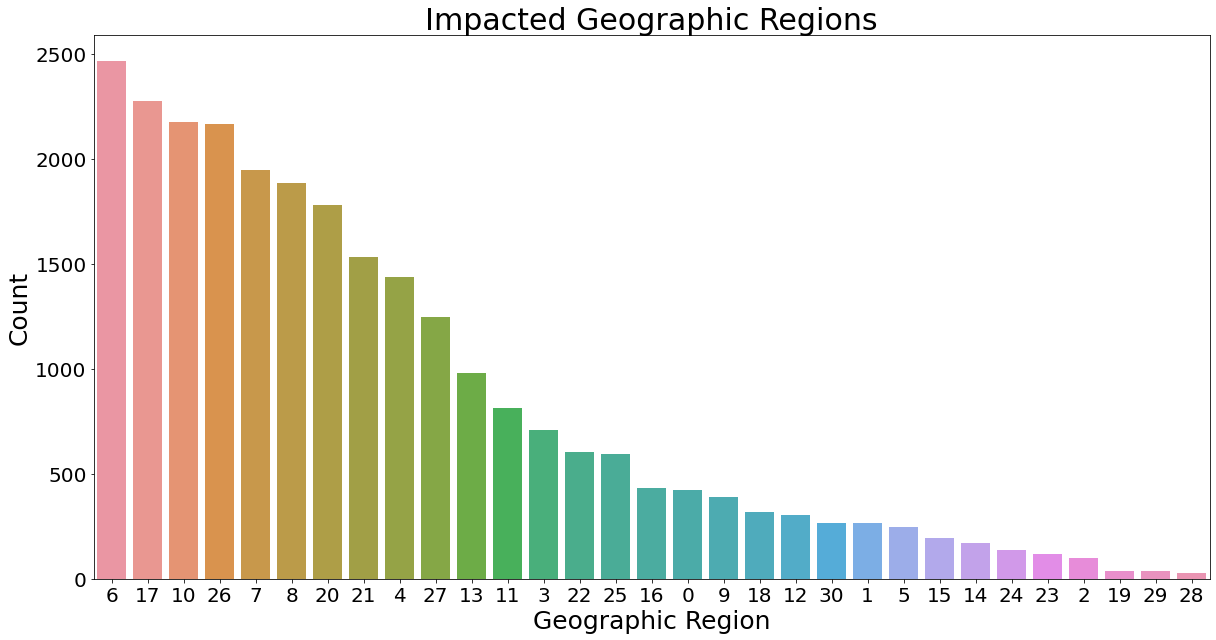

In [38]:
#Taking a look at Major Geographic Region (geo_level_1_id)

plt.figure (figsize=(20,10));
geo_1_vc_sorted = profile_train['geo_level_1_id'].value_counts().sort_values(ascending=False)
sns.barplot(x=geo_1_vc_sorted.index, y=geo_1_vc_sorted, order=geo_1_vc_sorted.index)

plt.title('Impacted Geographic Regions', size=30)
plt.xlabel('Geographic Region', size=25)
plt.ylabel('Count', size=25)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()


#### Building by Geographic Region
As we explored the data and the data dictionary, we created a few visuals based on features that we thought might contribute to the earthquake damage rating.
One of them was Geographic regions. The data dictionary provided by DataDriven was deliberately vague since it was a contest. There were 3 levels of geographic regions broken into three levels:

+ geo_level_1_id (a bit like a state in the U.S.)
+ geo_level_2_id (a bit like a county in the U.S.)
+ geo_level_3_id (a bit like a neighborhood in the U.S.)

The chart revealed that the majority of the buildings affected by the earthquake were situated in just seven geographic areas (the ones on the left of the chart).